# Introduction to the R Programming Language
### (Not a statistics program for pirates.)

Welcome to R! One of the world's most popular data analysis languages that boasts a staggeringly large number of user-created packages (12126 as of last night). CRAN, the central R package repository, requires that all packages be fully documented and that they work in the most current version of R.

R is an open source, object-oriented language with its source code written almost entirely in C. It functions in many similar ways to Python. As you can see, it also works with Jupyter Notebooks.

You can also run R in the terminal, via its own application, or through an IDE like R-Studio.

In this class, I'd like to give you an introduction to the fundamentals of R, before quickly moving on to doing some Bayesian data analysis.

We're going to be using a couple of packages throughout this notebook. Please run the commands below at your earliest convenience.

In [42]:
install.packages("LaplacesDemon")
install.packages("magicaxis")
library(LaplacesDemon)
library(magicaxis)

also installing the dependencies ‘RANN’, ‘sm’, ‘mapproj’, ‘celestial’

Warning message in install.packages("magicaxis"):
“installation of package ‘RANN’ had non-zero exit status”Warning message in install.packages("magicaxis"):
“installation of package ‘sm’ had non-zero exit status”Warning message in install.packages("magicaxis"):
“installation of package ‘mapproj’ had non-zero exit status”Warning message in install.packages("magicaxis"):
“installation of package ‘celestial’ had non-zero exit status”Warning message in install.packages("magicaxis"):
“installation of package ‘magicaxis’ had non-zero exit status”

ERROR: Error in library(magicaxis): there is no package called ‘magicaxis’


## Fundamentals of R.

R is a fully vectorized language, and supports many different data structures and types; including (but not limited to): 
* vectors (including single scalar elements) 
* matrices (2D structures of the same numeric type; i.e. integer, double, etc.)
* data frames (2D structures where columns can be different types)
* lists (ordered collections of objects, which can contain an arbitrary number of other data structures).

As you might expect, R supports integers, doubles (singles are automatically stored as doubles in R), strings, Boolean logic, and factors (categories of data, i.e. hair color ('brown', 'red', etc.).

### Very basics.

There is no type assignment necessary in R. You can just do this:

In [ ]:
a = 10
a = a + 2
a = a^2
a = a*10 + sqrt(a) + a^(1.3) - 1/a
a

### Vectors, matrices & data frames

In [ ]:
c(1,2,3,4)
c("fee","fi","fo","fum")

In [ ]:
foo1 <- c(1,2,3,4)
foo2 = c(5:8)
foo3 = seq(1,10,by=2) # Do ?seq to see more.

In [ ]:
foo1; foo2; foo3

Vector programming in R is very straightforward.

In [ ]:
b = c(1:10)
print(b)
for(i in 1:10){
    b[i] = b[i] * 10
}
print(b)

In [ ]:
b = c(1:10)
print(b)
b = b*10
print(b)

In [ ]:
1:10 * c(1,2)^2

In [ ]:
mat1 = matrix(data=1:9,nrow=3)
mat1

The function ```arg()``` will tell you all the arguments for another function. To call up the documentation for any function or command, use ```?```.

In [ ]:
args(matrix)

In [ ]:
?matrix

Matrix operations are built in.

In [ ]:
mat1 * 1:3
mat1 %*% 1:3

In [ ]:
mat2 = cbind(c(1,2,3),c(4,5,6),c(7,8,9))
mat1 %*% mat2

In [ ]:
eigen(mat1)

R has a number of built in data sets, which can be extremely useful when exploring the language for the first time. For today, we'll be using ```iris```. See more with ```?iris```.

In [ ]:
iris

This is an example of a data frame, which is perhaps the most common data type you'll be using in R. Let's take a moment to familiarize ourselves with data frames.

To get a quantitative overview of the contents of a data frame (or, indeed, any other data type), use the ```summary()``` function. ```str()``` on the other hand, will tell you about the structure of a data type.

In [ ]:
summary(iris)

In [ ]:
str(iris)

Square brackets ```[]``` are used to point to individual columns, rows, or cells of a data frame. ```data[i,j]``` 
will point to the element in the ith row and jth column. For a vector, ```vector[j]``` will point to the jth element of that vector.

In [ ]:
iris[1,2]

If you simply want to pull out an entire row or column, use ```data[i,]``` or ```data[,j]```. Alternatively, you can use the ```$``` symbol to refer to a column by its name. You can also mix and match as you like; i.e. ```data$foo[3]```.

In [ ]:
iris[,3]
iris[c(5,7),]

In [ ]:
colnames(iris)
iris$Species

Mix and match as you like!

In [ ]:
iris$Species[5]
iris$Petal.Length[5]

The ```which()``` function is used to identify specific subsets of data. Uses standard Boolean logic, i.e. ```which(data$foo >= 2 & data$foo2 <= 3)```.

### Quick problem 1:
*a)* Find the subset of iris flowers with a sepal length greater than 4.3cm, and petal length less than 1.2cm.

*b)* What species do these correspond to?

In [ ]:
iris[which(iris$Sepal.Length > 4.3 & iris$Petal.Length <= 1.2), 'Species']


### Lists

Lists are highly flexible, but also the most complicated structures in R.

In [ ]:
list1 = list(a=a, iris = iris[1:10,], vec=foo3)
list1

In [ ]:
list1[2]

In [ ]:
list1[[2]]

In [ ]:
list1$vec

In [ ]:
list1['a']

In [ ]:
list1[['a']]

Lists can get really complicated, and be endlessly recursive -- any element of a list can be another list. Lists can be really useful to keep your workspace tidy; for example, if the output of a function is several different matrices or data frames, they can all be bundled into a single list.

### Functions

I've already showed some examples pre-defined R functions that perform certain tasks. R lets you define your own functions as you like.

In [ ]:
newFunc <- function(x=1, power = 2, addon = 10){
    x ^ power + addon
}
newFunc()
newFunc(1:10)
newFunc(pow = 3, x=23:30)
newFunc(1:10,1:2,1:5)

In [ ]:
newFunc

### Plotting

Plotting is probably my favorite thing to do in R. Even the default plotting packages look decent; but with a little bit of extra work and customization, you can quickly and easily make publication-ready figures on the fly.

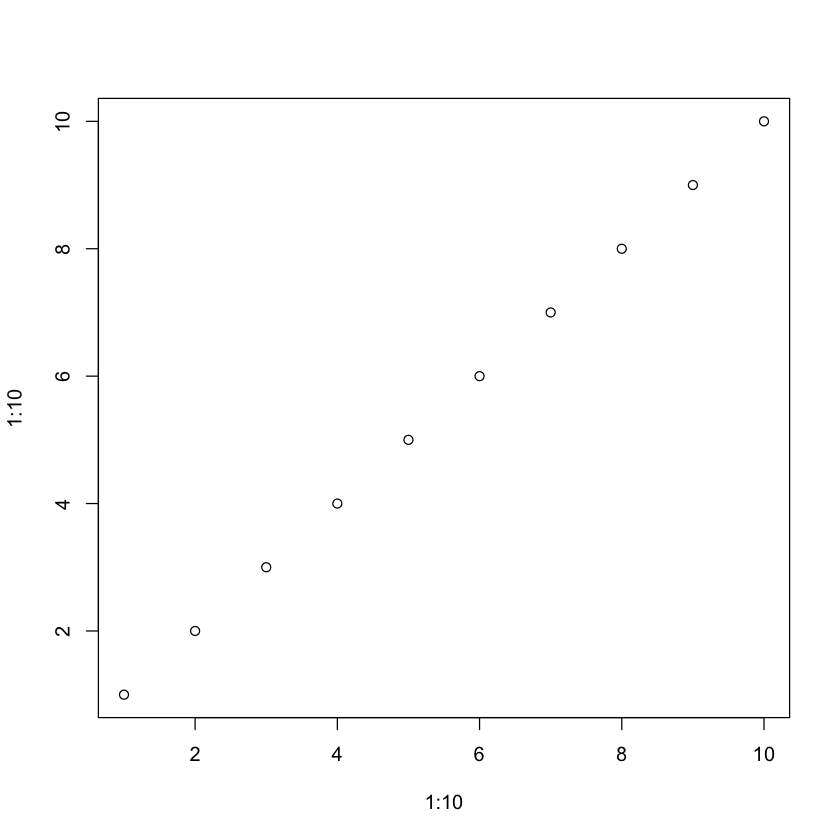

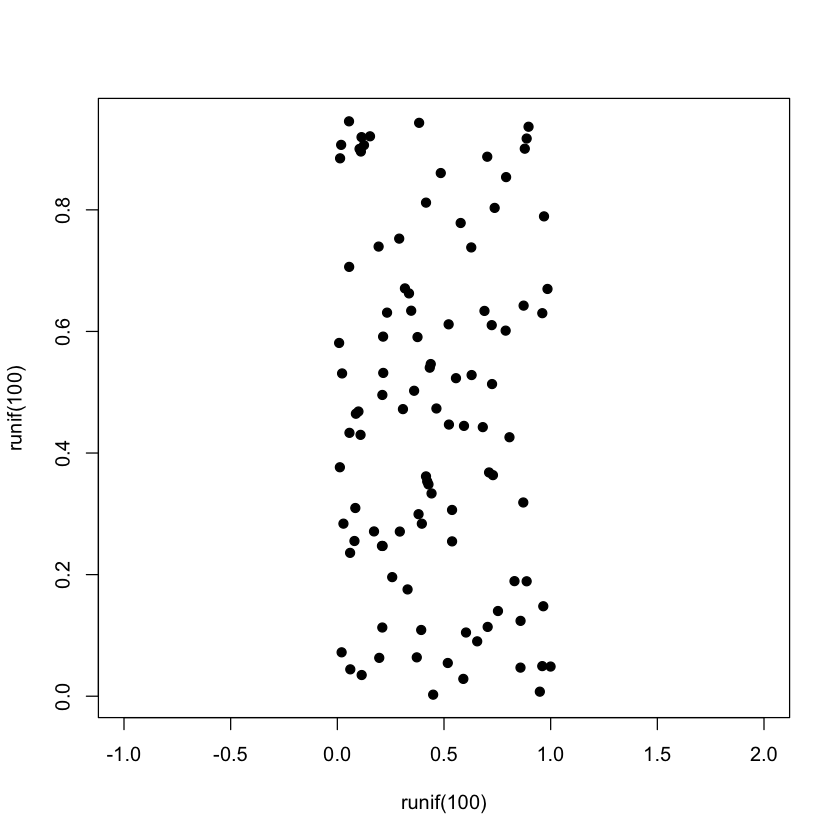

In [39]:
plot(1:10,1:10)
plot(runif(100),runif(100),pch=19, xlim=c(-1,2))

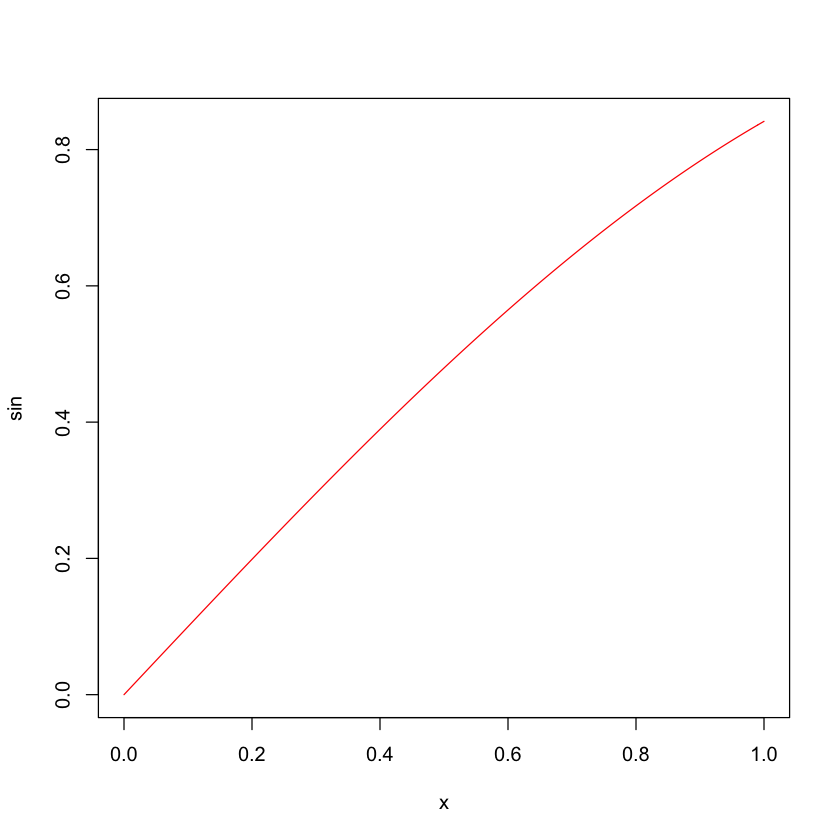

In [38]:
plot(sin,col='red')

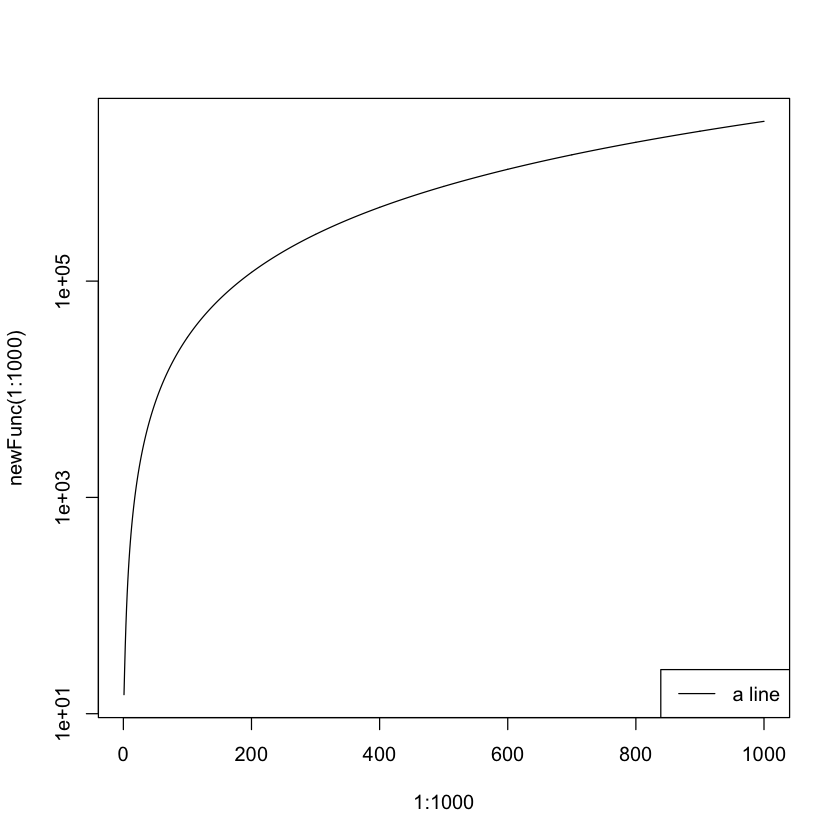

In [47]:
plot(1:1e3, newFunc(1:1e3),log='y',type='l')
legend('bottomright',legend='a line', lty=1)

### Quick problem 2:
Write your own function, and plot it using the ```curve()``` function.

*Hint:* Remember that you can look up the documentation for any function using ```?functionName```.

In [ ]:
newFunc <- function(x=1, a = 3,  b = 2, c = 10){
    a * x ^ 2  + b * x + c
}

curve(newFunc, from = -2, to= 2)

In [ ]:
?curve

### Quick problem 3:
Go back to the iris data set, and plot a histogram of all the sepal lengths for the *setosa* species.

Default histograms in R are probably the worst example of 'out of the box' plotting that the language can do. I prefer convolving my data with a kernel of fixed bandwidth, and plotting the PDF of that instead. You can do all that with the ```density()``` function. Give it a shot!

Try displaying both the PDF and the histogram on the same plot.

*Hint:* Remember to use ```type='l'```!

In [ ]:
sepal_lenghts = iris[which(iris$Species == 'setosa'), 'Sepal.Length']
hist(sepal_lenghts)

### Probability distributions

These are directly built into R. Uniform, normal, chi-squared, binomial, Poisson, all are built into base R. Do ```?Distributions``` to see the full available list. 

As a rule of thumb, the following functions interact with these distributions:
* ```dDistr``` gives the instantaneous density at a value.
* ```pDistr``` gives the integrated probability up to a value.
* ```qDistr``` gives the value at an integrated probability (i.e. a quantile).
* ```rDistr``` randomly samples the PDF to generate mock data. This is the one you will likely use most.

In [ ]:
?Distributions

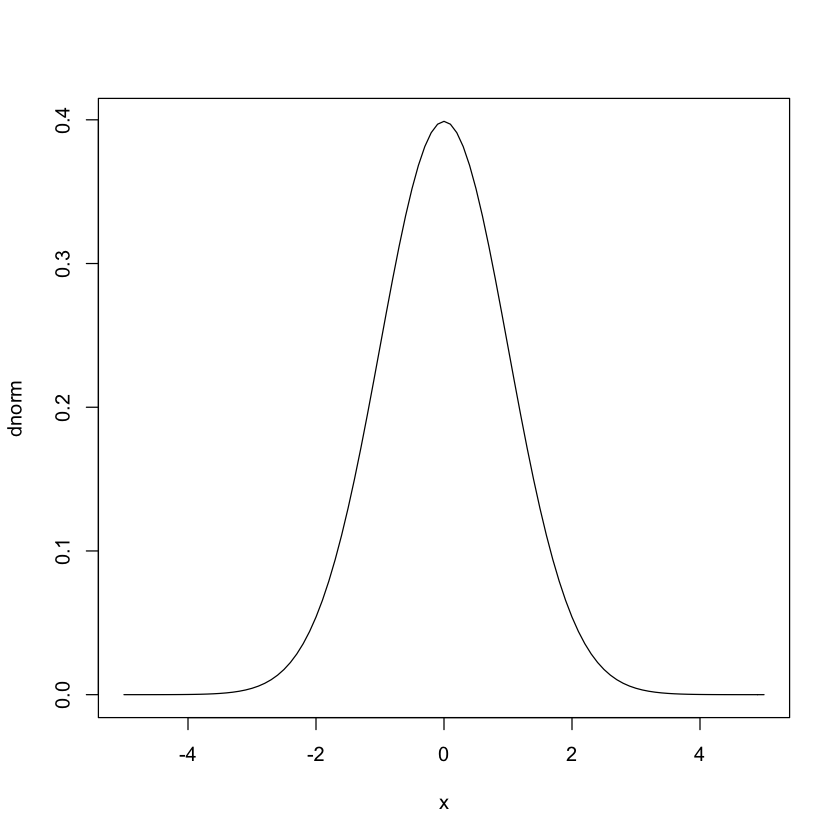

In [43]:
plot(dnorm,xlim=c(-5,5))

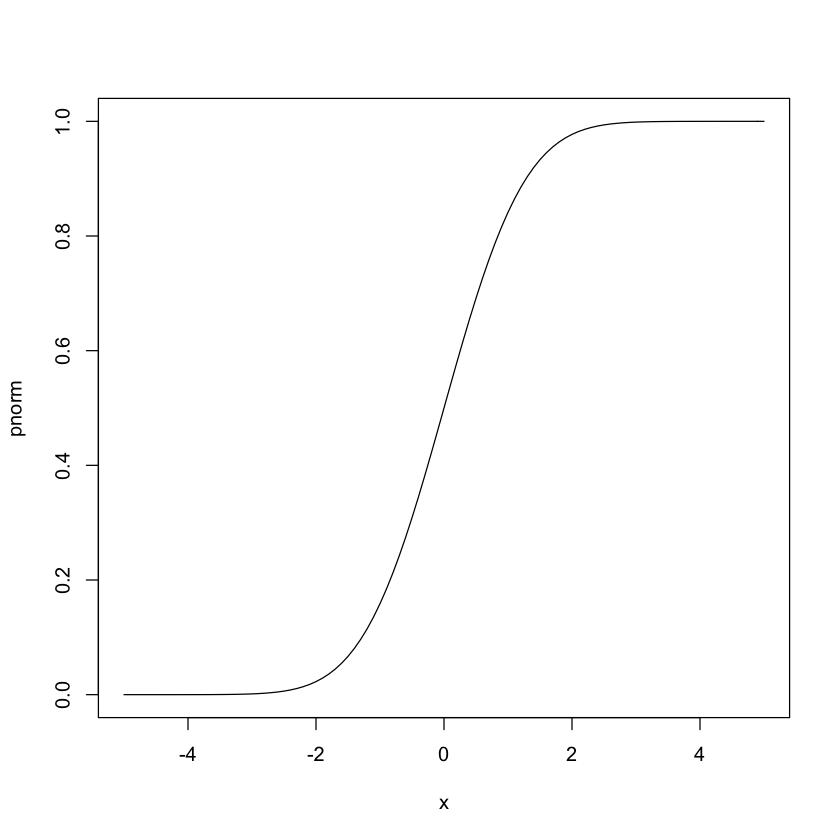

In [44]:
plot(pnorm,xlim=c(-5,5))

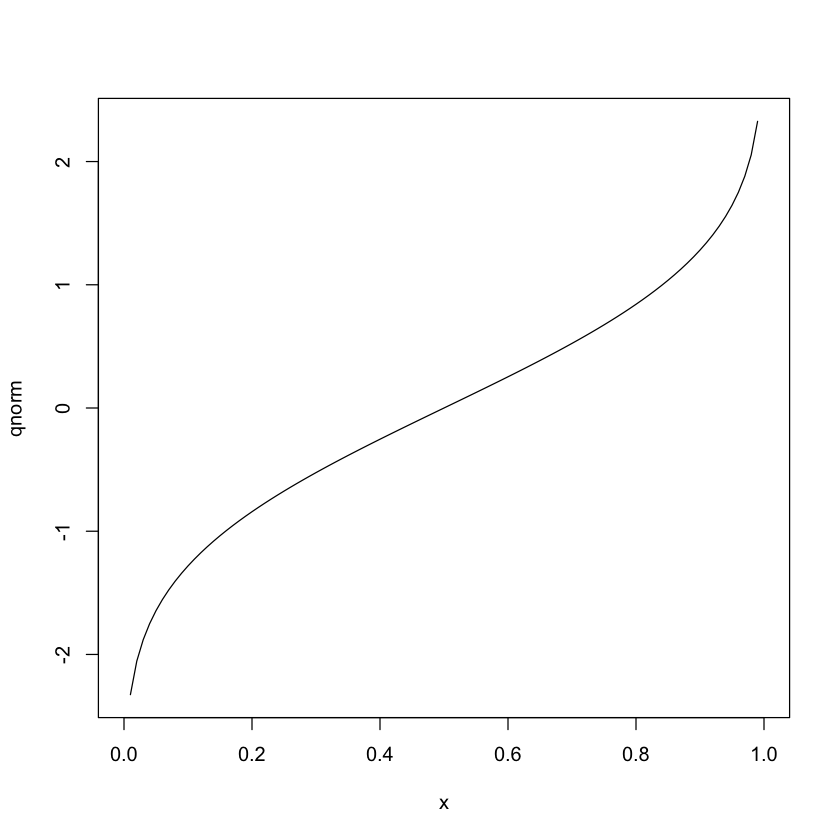

In [45]:
plot(qnorm,xlim=c(0,1))

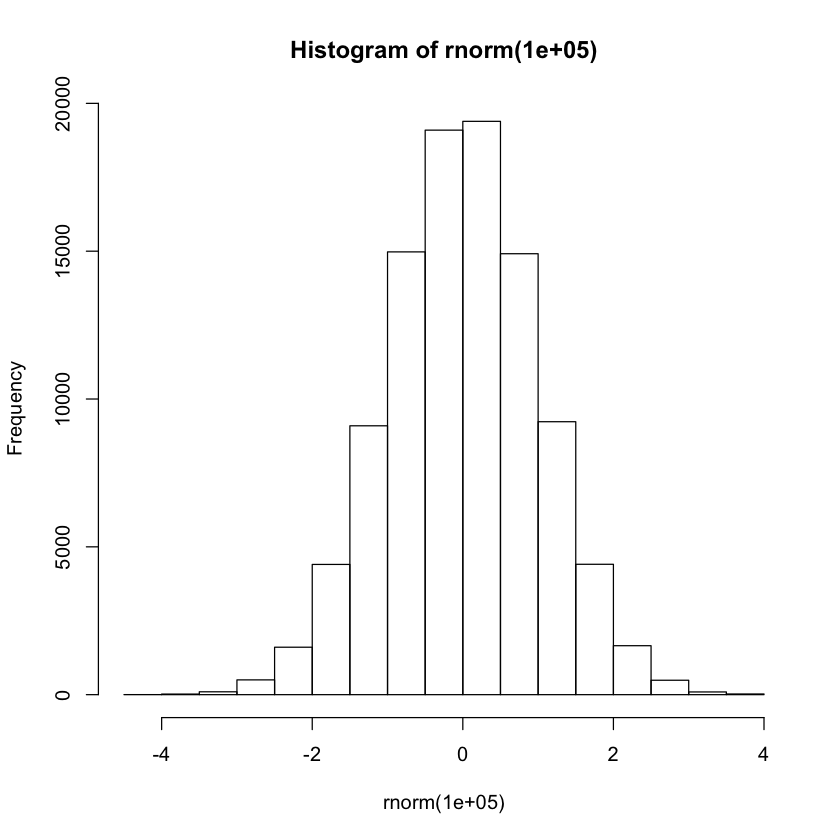

In [40]:
hist(rnorm(1E5))

## Problem 4:

Create a function in R to compute the x and y coordinates of an ellipse, just as in the previous problem set.

In [48]:
?polyroot

In [104]:
Ellipse_func <- function(x=1, h = 0,  k = 0, a = 4, b = 2, theta = pi/6)
{
    
    term1 = sin(theta)**2/(a **2) + cos(theta)**2/(b**2)
    term2 = -2 * ((x - h)*cos(theta) + k * sin(theta))*sin(theta)/a**2

    term3 = +2 * ((x - h)*sin(theta) - k * cos(theta))*cos(theta)/b**2
    term4 = ((x - h)*cos(theta) + k * sin(theta))**2/a**2
    term5 = ((x - h)*sin(theta) - k * cos(theta))**2/b **2 
        
    A = term1
    B = term2 + term3
    C = term4 + term5 - 1
    
    return(polyroot(c(C, B, A)))

}



vals = Re(Ellipse_func(x = 1:10))
vals

[1]  0.49292087 -0.45734067 -0.45734067  0.60082219  0.01379956 -0.74747659
 [7]  0.01379956  0.49292087  0.01448018 -0.74747659  0.01448018  1.10894042
[13] -0.70874022 -1.17606116  0.70845630  0.70845630 -1.17606116 -0.70874022
[19]  1.10894042 -7.09286023

In [81]:
vals = Ellipse_func(-3:3)
curve(Ellipse_func(), -3, 3)

ERROR: Error in curve(Ellipse_func(), -3, 3): 'expr' must be a function, or a call or an expression containing 'x'


## Bayesian statistics in R.

Let's look at a common problem in observational astrophysics -- you're putting together a luminosity function based on some galaxy survey data, and have zero counts in a bin. What is the most likely value of $\lambda$ for the underlying Possion distribution that generated this?

$\lambda$ may well be nonzero...

In [76]:
library(magicaxis)

ERROR: Error in library(magicaxis): there is no package called ‘magicaxis’


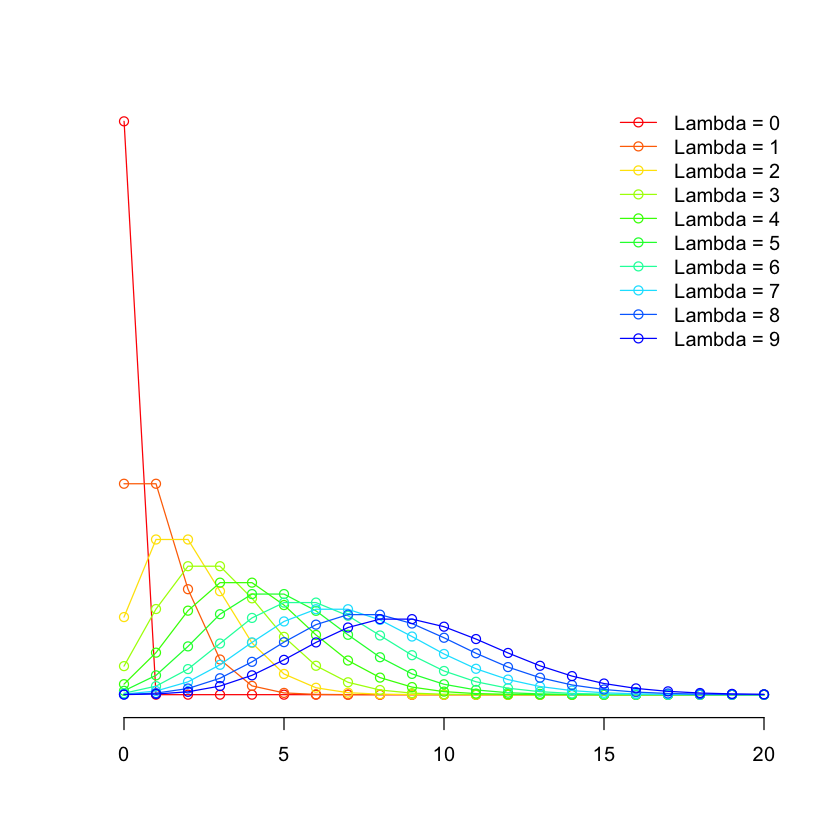

In [64]:
plot.new();plot.window(c(0,20),c(0,1))
axis(xlab='k',ylab='P(X = k)',side=1:4)
for(i in 1:10){
lines(0:20,dpois(0:20,i-1),col=rainbow(10,end=2/3)[i])
points(0:20,dpois(0:20,i-1),col=rainbow(10,end=2/3)[i])}
legend('topright',legend=paste('Lambda =',0:9),col=rainbow(10,end=2/3),lty=1,pch=1,bty='n')

In Bayesian statistics, the prior $p(\theta)$ is the probability of the model based on prior knowledge of how the input parameters might be distributed. In this case, the input parameter is just $\lambda$.

In this example, we have no prior knowledge: so our prior for $\lambda$ is a uniform distribution from 0 to $\infty$. So let's compute $p( y = 0, \theta)$ for all possible $\lambda$. This goes to 0 quickly, so we can just stop at $\lambda = 5.$

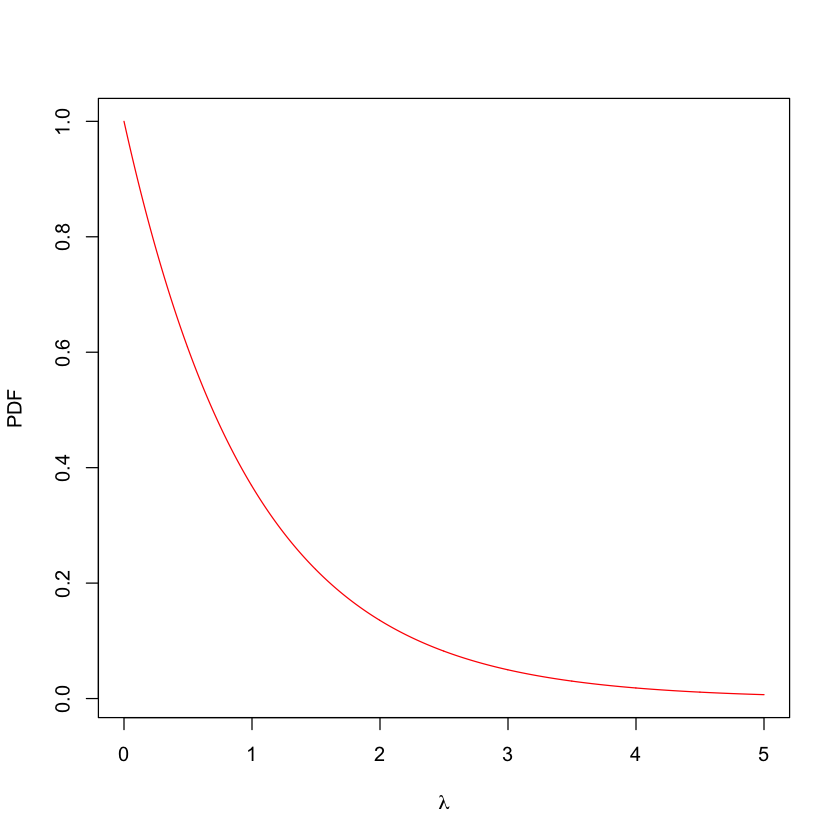

In [65]:
xval = seq(0, 5, length.out=1000)
plot(xval, dpois(0, xval), type='l',col='red',xlab=expression(lambda),ylab='PDF')

Bayesian problems generally require some data, a likelihood model, and some way of producing a posterior distribution.

In [66]:
Data = list(data = 0, mon.names = '', parm.names = 'lambda', N = 1)
Model = function(parm, Data){
    parm = interval(parm,0,100)
    val.prior = log(dunif(parm,0,100))
    LL = log(dpois(Data$data,parm))
    LP = LL + val.prior
    Modelout = list(LP=LP, Dev=2*LL, Monitor = 1, yhat=1, parm=parm)
}

It is usually not easy to calculate the posterior directly, so we need a scheme that can integrate the posterior likelihood space in a manner that reflects the parameter distributions.

If we choose a value x for λ, and compare that posterior likelihood to another value for λ (x+dx), the ratio of likelihoods (the BF) tells us the relative densities of the posterior PDF.

To walk through the posterior space we can do the following:
*      If the likelihood at λ(x+dx) is higher than λ(x) we update the posterior.
*      If the likelihood at λ(x+dx) is lower than λ(x) we accept it if a random number between 0 and the likelihood at λ(x) is less than the likelihood at λ(x+dx).

If we keep a chain of all posterior values, the PDF of this chain will reflect the posterior likelihood distribution.

This is a Metropolis-Hastings algorithm.

In [67]:
MH=function(Model,Data,start=1,iterations=1e4,thin=100,step=1,burn=0.1){
    posterior={}
    mod=Model(start,Data)
    parm=mod$parm
    currentLP=mod$LP
    keep={} 
    for(i in 1:iterations){
        trial=parm+rnorm(1,sd=step)
        mod=Model(trial,Data)
        trial=mod$parm; newLP=mod$LP
        if(newLP>currentLP){
            parm=trial
            currentLP=newLP
            keep=c(keep,TRUE)
        }else{
            check=runif(1,0,exp(currentLP))<exp(newLP)
            if(check){
                parm=trial
                currentLP=newLP
                keep=c(keep,TRUE)
            }else{
                keep=c(keep,FALSE)
            }
        }

    if(i %% thin ==0){
        posterior=c(posterior,parm)
        }
    }
    posterior=posterior[1:length(posterior)>burn*length(posterior)] 
    return=list(posterior=posterior,acrate=length(which(keep))/iterations) 
}

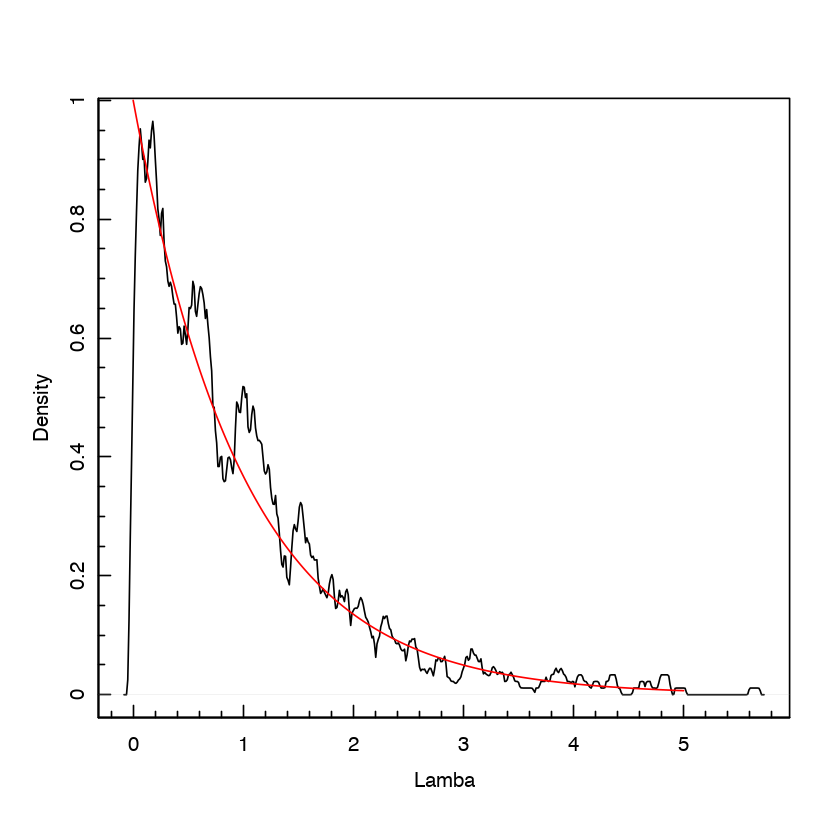

In [8]:
testMH=MH(Model, Data, start=1, iterations=1e5, thin=100, step=5, burn=0.1)
magplot(density(testMH$posterior,kern='rect',bw=0.1/sqrt(12)),xlab='Lamba',ylab='Density')
lines(xval,dpois(0,xval),col='red')

### Let's examine an astrophysical problem! 

The Schechter function is a parametrisation of how galaxies are distributed per unit volume in the Universe. It's an excellent fit to luminosity functions. It generally carries the form:

$dN = \theta(L)dL = (\theta^* / L^*) (L / L*)^{\alpha} \exp(-L/L^*)dL$

Let's generate a mock Schechter function, and then see how well we can recover its parameters. We'll do the generation in a slightly odd way, by creating a random pointing galaxy data in order to use a Monte-Carlo accept-reject technique later.

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“10 y values <= 0 omitted from logarithmic plot”

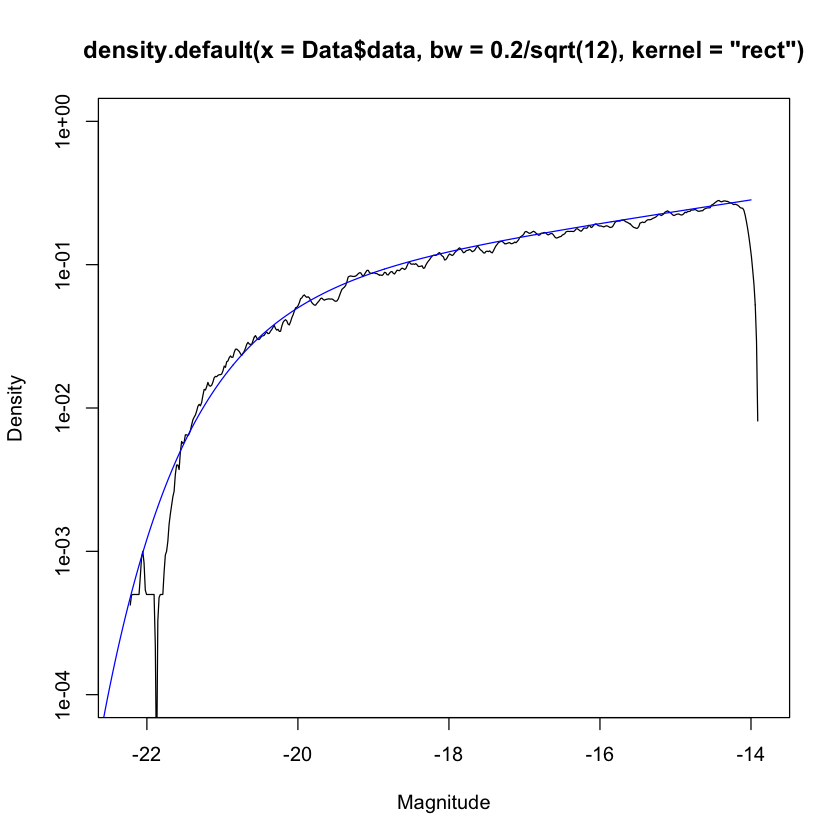

In [69]:
schec=function (m, ns, ms, alpha){ #This is the famous Schechter function
0.4*log(10)*ns*exp(0.4*log(10)*(alpha+1)*(ms-m)-exp(0.4*log(10)*(ms-m)))}

genLF=function(N, ms= -20, alpha= -1, mb= -25, mf= -14){
    maxval = max(schec(seq(mb, mf, by = 0.01), ns = 1, ms = ms, alpha = alpha))
    temp = cbind(runif(N, mb, mf), runif(N, 0, maxval + maxval * 0.01))
    temp = cbind(temp, schec(temp[, 1], ns = 1, ms = ms, alpha = alpha))
    mags = temp[temp[, 2] < temp[, 3], 1]
    gens = 2 * ceiling(N/length(mags)) * N
    temp = cbind(runif(gens, mb, mf), runif(gens, 0, maxval + maxval * 0.01))
    temp = cbind(temp, schec(temp[, 1], ns = 1, ms = ms, alpha = alpha))
    mags = c(mags, temp[temp[, 2] < temp[, 3], 1])
    mags = mags[1:N]
    return(mags)
    }

Data=list(data=genLF(1e4,ms=-20.5,alpha=-1.2),
mon.names='ns',parm.names=c('ms','alpha'),N=1e4)

plot(density(Data$data,kern='rect',bw=0.2/
sqrt(12)),log='y',ylim=c(1e-4,1),xlab='Magnitude',ylab='Density')

ns=1/integrate(schec,-25,-14,ns=1,ms=-20.5,alpha=-1.2)$value

lines(seq(-24,-14,len=1e3),schec(seq(-24,-14,len=1e3),
ns=ns,ms=-20.5,alpha=-1.2),col='blue')

In [70]:
Model=function(parm,Data){
ns=1/integrate(schec,-25,-14,ns=1,ms=parm[1],alpha=parm[2])$value
val.prior=dunif(parm[1],-30,-10,log=TRUE)+dunif(parm[2],-3,1,log=TRUE)
LL=sum(log(schec(Data$data,ns=ns,ms=parm[1],alpha=parm[2])))
LP=LL+val.prior
Modelout=list(LP=LP,Dev=2*LL,Monitor=ns,yhat=1,parm=parm)}

Let's use a package called Laplace's Demon to do our fit. This package is named after a hypothetical creature that could potentially intuit everything there is to know about the Universe, provided it knows all the properties of the Universe.

While that doesn't exist, this package does! And it's a great bundle of common Bayesian tools, including many MCMC algorithms.

In [71]:
library(LaplacesDemon)
FitLF=LaplacesDemon(Model, Data, Initial.Values=c(-20,-1), Algorithm='HARM', Iterations=1e5)


Laplace's Demon was called on Tue Jan 23 17:22:49 2018

Performing initial checks...
Algorithm: Hit-And-Run Metropolis 

Laplace's Demon is beginning to update...
Iteration: 100Iteration: 100,   Proposal: Multivariate,   LP: -18234.4
Iteration: 200Iteration: 200,   Proposal: Multivariate,   LP: -18232.3
Iteration: 300Iteration: 300,   Proposal: Multivariate,   LP: -18229.9
Iteration: 400Iteration: 400,   Proposal: Multivariate,   LP: -18229.7
Iteration: 500Iteration: 500,   Proposal: Multivariate,   LP: -18229.6
Iteration: 600Iteration: 600,   Proposal: Multivariate,   LP: -18229.5
Iteration: 700Iteration: 700,   Proposal: Multivariate,   LP: -18229.5
Iteration: 800Iteration: 800,   Proposal: Multivariate,   LP: -18229.5
Iteration: 900Iteration: 900,   Proposal: Multivariate,   LP: -18229.5
Iteration: 1000Iteration: 1000,   Proposal: Multivariate,   LP: -18230.2
Iteration: 1100Iteration: 1100,   Proposal: Multivariate,   LP: -18229.9
Iteration: 1200Iteration: 1200,   Proposal: Multiva

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“10 y values <= 0 omitted from logarithmic plot”

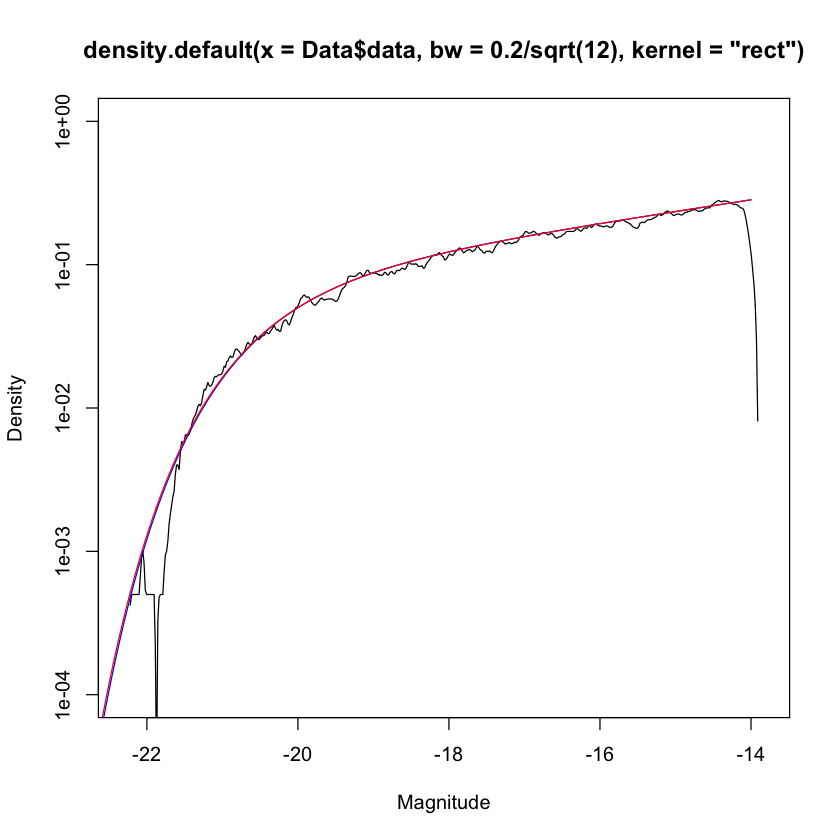

In [72]:
plot(density(Data$data,kern='rect',bw=0.2/
sqrt(12)),log='y',ylim=c(1e-4,1),xlab='Magnitude',ylab='Density')

ns=1/integrate(schec,-25,-14,ns=1,ms=-20.5,alpha=-1.2)$value

lines(seq(-24,-14,len=1e3),schec(seq(-24,-14,len=1e3),
ns=ns,ms=-20.5,alpha=-1.2),col='blue')

ns=1/integrate(schec,-25,-14,ns=1, ms=FitLF$Summary2[1,'Mean'],
alpha=FitLF$Summary2[2,'Mean'])$value

lines(seq(-24,-14,len=1e3),schec(seq(-24,-14,len=1e3),
ns=ns,ms=FitLF$Summary2[1,'Mean'],
alpha=FitLF$Summary2[2,'Mean']),col='red')

It's a good fit! Let's examine the posterior distribution to see how well the Demon is performing.

In [79]:
library(magicaxis)
magcon(FitLF$Posterior2[,1], FitLF$Posterior2[,2],conlevels=c(0.5,0.68,0.95),lty=c(2,1,3),xlim=c(-20.65,-20.2),ylim=c(-1.23,-1.16))
title(xlab='M*',ylab=expression(alpha))
points(FitLF$Summary2[1,'Mean'],FitLF$Summary2[2,'Mean'],col='black',pch=4)
points(-20.5,-1.2,col='blue',pch=4)

ERROR: Error in library(magicaxis): there is no package called ‘magicaxis’
